# canonical correlation analysis

In [15]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [22]:
# データの読み込み
students_df = pd.read_csv('/work/MLnote/statistics/dataset/StudentsPerformance.csv')
body_df = pd.read_csv('/work/MLnote/statistics/dataset/bodyPerformance.csv')

In [23]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
students_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [25]:
body_df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [26]:
body_df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [28]:
# 学力データを1000サンプルにする（既に1000なのでそのまま）
X = students_df[['math score', 'reading score', 'writing score']].values

# 体力データをランダムサンプリングして1000サンプルに揃える
body_sampled = body_df.sample(n=len(students_df), random_state=42)
Y = body_sampled[['gripForce', 'sit and bend forward_cm', 'broad jump_cm']].values

# データの標準化
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
Y_standardized = scaler.fit_transform(Y)

# 正準相関分析
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X_standardized, Y_standardized)

# 正準相関係数の計算
correlations = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(2)]
print("正準相関係数:", correlations)

正準相関係数: [np.float64(0.13138791864328744), np.float64(0.07539936329242598)]


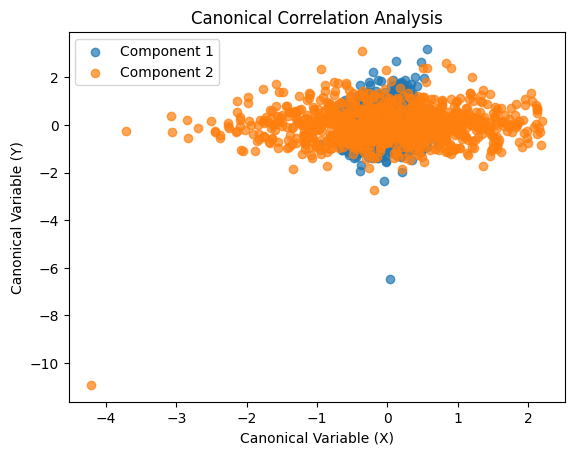

In [29]:
# 可視化（オプション）
import matplotlib.pyplot as plt

plt.scatter(X_c[:, 0], Y_c[:, 0], alpha=0.7, label='Component 1')
plt.scatter(X_c[:, 1], Y_c[:, 1], alpha=0.7, label='Component 2')
plt.xlabel('Canonical Variable (X)')
plt.ylabel('Canonical Variable (Y)')
plt.title('Canonical Correlation Analysis')
plt.legend()
plt.show()